In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


# Example: Bisection Method
Given a continuous function $f(x)$ and an open interval $(a, b)$ such that $a<b$ and $f(a)f(b) < 0$,
  1. Set $c = \frac{a + b}{2}$
  2. If $\vert c - a \vert < {\rm tol}$ end and return $c$
  3. If $f(c)f(b) < 0$ then set $a = c$, otherwise set $b = c$
  4. repeat step 1

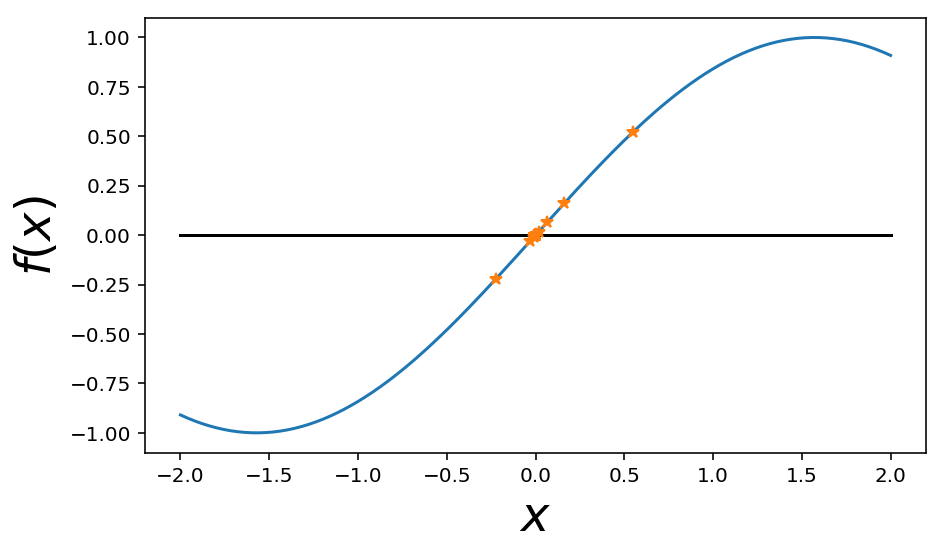

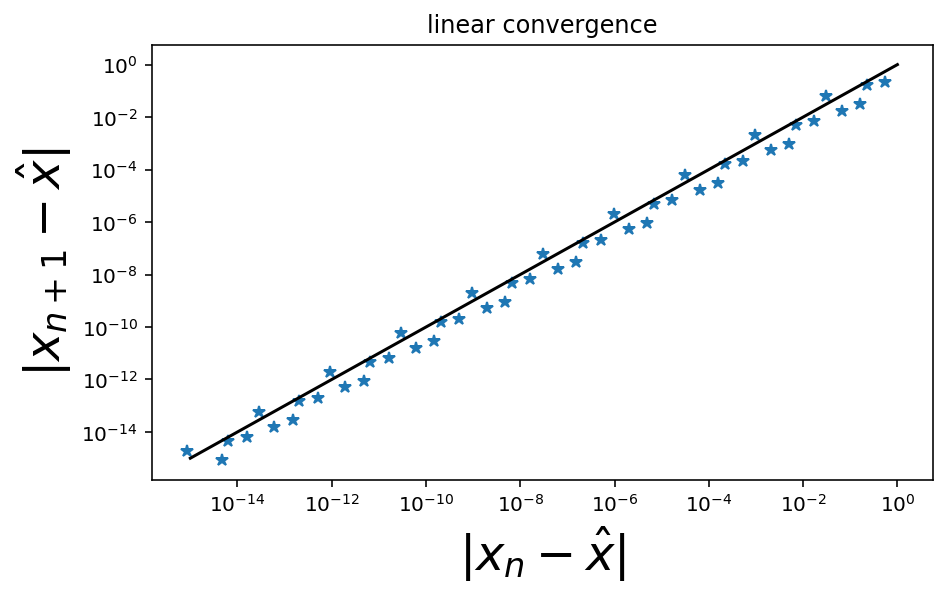

In [2]:
## parameters

Nsteps = 50 ## we will run a fixed number of steps instead of testing for an error tolerance (step 2)
a = -1.
b = 2.1
xhat = 0.

# a = 1.
# b = 4.
# xhat = pi

def f(x):
    return sin(x)

x = zeros(Nsteps)
for j in arange(Nsteps):
    c = (a + b)/2.
    x[j] = c
    if f(c)*f(b) < 0:
        a = c
    else:
        b = c
    if f(c) == 0.: ## this is for the unlikely event that we find the exact root
        break
    
figure(1, [7, 4])
xplot = linspace(-2, 2, 200)
plot(xplot, 0*xplot, 'k') ## plot the line y=0
plot(xplot, f(xplot)) ## plot f(x)
plot(x, f(x), '*') ## plot the iterates of bisection
xlabel(r'$x$', fontsize=24) ## x axis label
ylabel(r'$f(x)$', fontsize=24); ## y axis label

## Convergence plot
figure(2, [7, 4])
err = absolute(x - xhat)
loglog(err[:-1], err[1:], '*') ## plot the iterates of bisection
err_plot = array([1e-15, 1e-6, 1e-1, 1.])
conv = err_plot  # linear. the theoretecal convergence curve
loglog(err_plot, conv, 'k')
xlabel(r'$\vert x_n - \hat{x}\vert$', fontsize=24) ## x axis label
ylabel(r'$\vert x_{n+1} - \hat{x}\vert$', fontsize=24) ## y axis label
title('linear convergence');

In [3]:
print(err)

[5.50000000e-01 2.25000000e-01 1.62500000e-01 3.12500000e-02
 6.56250000e-02 1.71875000e-02 7.03125000e-03 5.07812500e-03
 9.76562500e-04 2.05078125e-03 5.37109375e-04 2.19726562e-04
 1.58691406e-04 3.05175781e-05 6.40869141e-05 1.67846680e-05
 6.86645508e-06 4.95910645e-06 9.53674316e-07 2.00271606e-06
 5.24520874e-07 2.14576721e-07 1.54972076e-07 2.98023224e-08
 6.25848770e-08 1.63912773e-08 6.70552251e-09 4.84287742e-09
 9.31322546e-10 1.95577744e-09 5.12227445e-10 2.09547551e-10
 1.51339947e-10 2.91038018e-11 6.11180726e-11 1.60071354e-11
 6.54833320e-12 4.72940110e-12 9.09466051e-13 1.90996752e-12
 5.00250737e-13 2.04607657e-13 1.47821540e-13 2.83930585e-14
 5.97142407e-14 1.56605911e-14 6.36623371e-15 4.64717870e-15
 8.59527503e-16 1.89382560e-15]


# Example: Newton's Method
$$ x_{n+1} = x_{n} - \frac{f(x_{n})}{f'(x_{n})}. $$

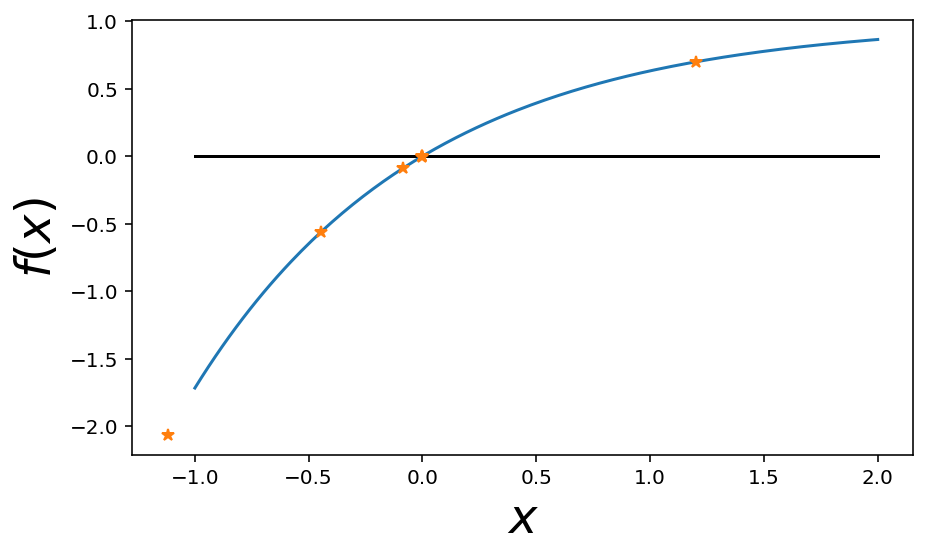

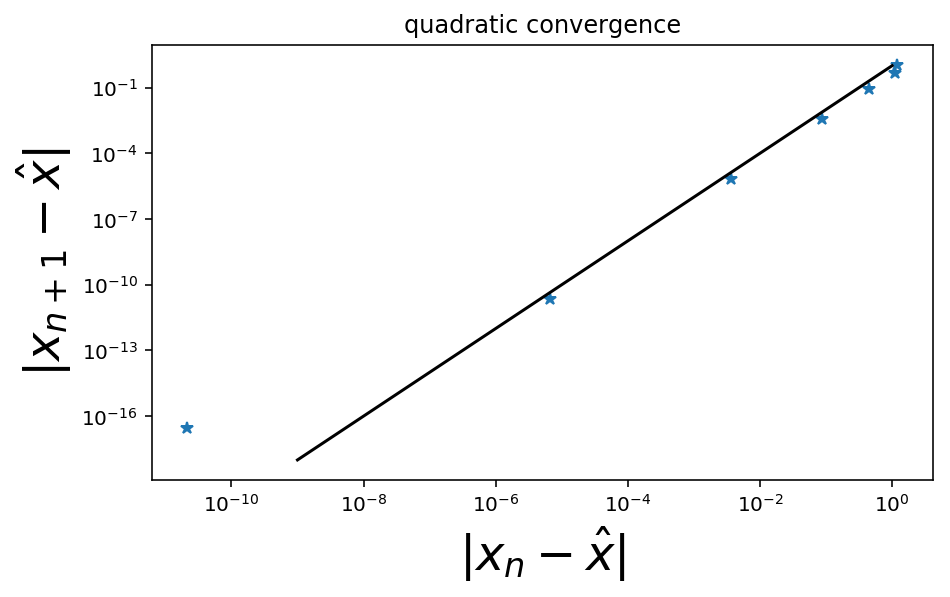

In [4]:
## parameters

Nsteps = 8 ## we will run a fixed number of steps instead of testing for an error tolerance (step 2)
x0 = 1.2
xhat = 0.

def f(x):
    return 1-exp(-x)
def fprime(x):
    return exp(-x)

x = zeros(Nsteps)
x[0] = x0
for j in arange(Nsteps-1):
    x[j+1] = x[j] - f(x[j])/fprime(x[j])
    
    

figure(1, [7, 4])
xplot = linspace(-1, 2, 200)
plot(xplot, 0*xplot, 'k') ## plot the line y=0
plot(xplot, f(xplot)) ## plot f(x)
plot(x, f(x), '*') ## plot the iterates of bisection
xlabel(r'$x$', fontsize=24) ## x axis label
ylabel(r'$f(x)$', fontsize=24); ## y axis label

## Convergence plot
figure(2, [7, 4])
err = absolute(x - xhat)
loglog(err[:-1], err[1:], '*') ## plot the iterates of bisection
err_plot = array([1e-9, 1e-6, 1e-1, 1.])
conv = err_plot**2  # quadratic. the theoretecal convergence curve
loglog(err_plot, conv, 'k')
xlabel(r'$\vert x_n - \hat{x}\vert$', fontsize=24) ## x axis label
ylabel(r'$\vert x_{n+1} - \hat{x}\vert$', fontsize=24) ## y axis label
title('quadratic convergence');

In [5]:
print(err)

[1.20000000e+00 1.12011692e+00 4.46358570e-01 8.63128325e-02
 3.62005532e-03 6.54450073e-06 2.14152856e-11 2.83971680e-17]


# Example: a transcendental characteristic equation
## This is an example that I have encountered in research: solving an equation for the set of eigenvalues of a differential operator

In [6]:
## parameters
Nsteps = 20 ## we will run a fixed number of steps instead of testing for an error tolerance (step 2)

@interact(n=(1, 20, 1)) ## This will create a slider for the variable n, between 1 and 20, counting by 1
def plot_fn(n=1): ## define a "plot" function with a default value of the slider var (n=1)
    x0 = n*pi
    def f(x):
        return arctan(x) - x + n*pi
    def fprime(x):
        return 1./(1. + x**2) - 1.

    x = zeros(Nsteps)
    x[0] = x0
    for j in arange(Nsteps-1):
        x[j+1] = x[j] - f(x[j])/fprime(x[j])


    xhat = x[-1] ## approximate


    fig = figure(1, [14, 4]) ## creates a figure
    
    fig.add_subplot(121) ## makes a subplot (1 by 2 grid) and specifies the first suplot
    xplot = linspace((n-1)*pi, (n+2)*pi, 200)
    plot(xplot, 0*xplot, 'k') ## plot the line y=0
    plot(xplot, f(xplot)) ## plot f(x)
    plot(x, f(x), '*') ## plot the iterates of bisection
    xlabel(r'$x$', fontsize=24) ## x axis label
    ylabel(r'$f(x)$', fontsize=24); ## y axis label

    ## Convergence plot
    fig.add_subplot(122) ## makes a subplot (1 by 2 grid) and specifies the second suplot
    err = absolute(x - xhat)
    loglog(err[:-1], err[1:], '*') ## plot the iterates of bisection
    err_plot = array([1e-9, 1e-6, 1e-1, 1.])
    conv = err_plot**2  # quadratic. the theoretecal convergence curve
    loglog(err_plot, conv, 'k')
    xlabel(r'$\vert x_n - \hat{x}\vert$', fontsize=24) ## x axis label
    ylabel(r'$\vert x_{n+1} - \hat{x}\vert$', fontsize=24) ## y axis label
    title('quadratic convergence');

interactive(children=(IntSlider(value=1, description='n', max=20, min=1), Output()), _dom_classes=('widget-int…

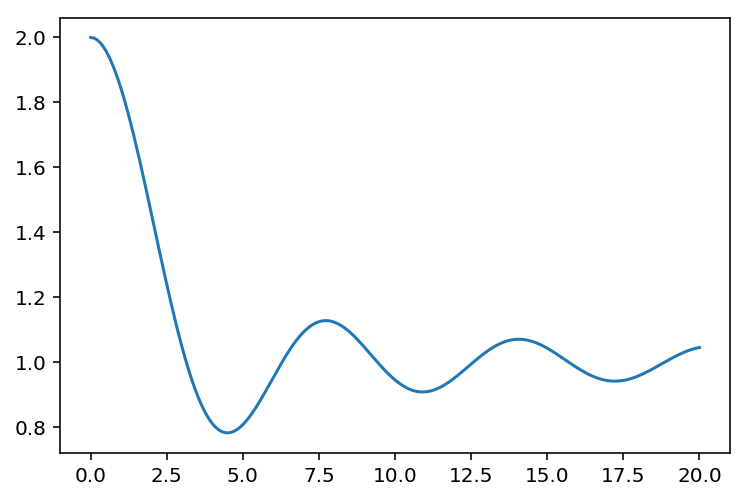

In [7]:
x = linspace(1e-5, 20, 200)
y = sin( 20/(1 + x**2))
y = 1 + sin(x)/x
plot(x, y)